In [10]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, accuracy_score

In [30]:
# monthly = pd.read_csv("monthly-data.csv")
monthly2 = pd.read_csv("monthly-data2.csv")
monthly2.dropna(inplace=True)
monthly2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,SMA,...,ADMI,CCI,ROC,RSI,Williams,STOCHFK,STOCHFD,ChaikinAD,Direction,30DayReturn
0,2020-05-07,78.113312,78.668648,76.893570,77.845566,1190600.0,0.0,0.0,A,74.695473,...,12.807454,98.583746,14.057652,51.751234,-15.151471,84.848529,66.995833,9.913589e+06,Up,0.130318
1,2020-05-08,79.005804,79.660305,78.529810,79.045471,2255000.0,0.0,0.0,A,74.899661,...,12.695859,129.227668,8.400503,52.778156,-5.241614,94.758386,68.472415,9.715769e+06,Up,0.110651
2,2020-05-11,78.936385,81.306459,78.837220,80.592461,1691600.0,0.0,0.0,A,75.248065,...,12.706210,155.587731,14.901721,54.081628,-5.198569,94.801431,70.325849,1.042909e+07,Up,0.098560
3,2020-05-12,80.899876,81.613875,79.114880,79.184296,2278900.0,0.0,0.0,A,75.485403,...,12.737996,137.848397,9.880268,52.711524,-17.302305,82.697695,71.515981,8.276797e+06,Up,0.084033
4,2020-05-13,79.709882,81.246963,78.371138,79.491722,2664900.0,0.0,0.0,A,75.767697,...,12.698816,122.341349,11.924055,52.980548,-15.112960,84.887040,72.905882,7.688689e+06,Up,0.088573


In [12]:
monthly = monthly.dropna()

In [31]:
# X = monthly.loc[:, "SMA":"STOCHFD"]
X2 = monthly2.loc[:, "SMA":"ChaikinAD"]
# y = monthly["Direction"]
y2 = monthly2["Direction"]
train_x, test_x, train_y, test_y = train_test_split(X2, y2, random_state=1)

In [33]:
len(train_x)

213546

In [24]:
# smote_train_x, smote_train_y = SMOTE(sampling_strategy="auto", random_state=1, k_neighbors=10).fit_resample(X=train_x, y=train_y)

In [34]:
train_y.value_counts()

Up      130486
Down     83060
Name: Direction, dtype: int64

In [26]:
# smote_train_y.value_counts()

In [35]:
rf = RandomForestClassifier(n_estimators=1000, max_features="sqrt", random_state=1, warm_start=True, oob_score=True)
rf.fit(train_x, train_y)
rf_preds = rf.predict(test_x)

In [36]:
print(classification_report(y_true=test_y, y_pred=rf_preds))

              precision    recall  f1-score   support

        Down       0.89      0.69      0.78     27627
          Up       0.83      0.95      0.89     43555

    accuracy                           0.85     71182
   macro avg       0.86      0.82      0.83     71182
weighted avg       0.85      0.85      0.85     71182



In [37]:
accuracy_score(y_true=test_y, y_pred=rf_preds)

0.8494984687140007

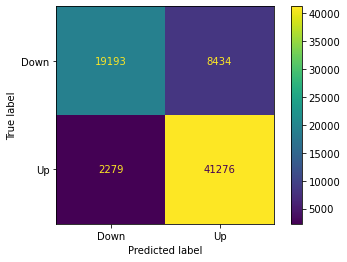

In [38]:
plot_confusion_matrix(estimator=rf, X=test_x, y_true=test_y)

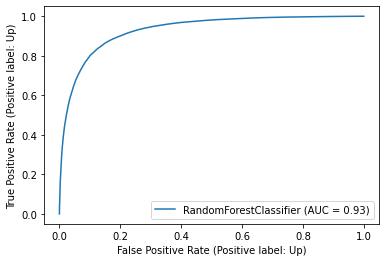

In [39]:
plot_roc_curve(estimator=rf, X=test_x, y=test_y)

| Model | Params | Data | Acc. | Recall "Up" | Recall "Down" | Prec. "Up" | Prec. "Down" | F1 "Up" | F1 "Down" | AUC |
| ----- | ------ | -----| ---- | ----------- | ------------- | ---------- | ------------ | ------- | --------- | --- |
| RF | trees=1000; m="sqrt"; oob score | Regular data | 0.77 | 0.93 | 0.48 | 0.76 | 0.80 | 0.84 | 0.60 | 0.84 |
| RF | trees=1000; m="sqrt"; oob score | SMOTE training data | 0.75 | 0.80 | 0.71 | 0.83 | 0.67 | 0.81 | 0.69 | 0.83 |
| RF | trees=1000; m="sqrt"; oob score | Added WMA, TEMA, and Chaikin AD | 0.85 | 0.95 | 0.69 | 0.83 | 0.89 | 0.89 | 0.78 | 0.93 |

In [48]:
joblib.dump(rf, "random-forest.sav")

['random-forest.sav']

In [ ]:
# rf = joblib.load("random-forest.sav")

In [41]:
monthly2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker', 'SMA', 'EMA', 'WMA', 'TEMA', 'ADMI', 'CCI',
       'ROC', 'RSI', 'Williams', 'STOCHFK', 'STOCHFD', 'ChaikinAD',
       'Direction', '30DayReturn'],
      dtype='object')

In [45]:
features = np.array(monthly2.columns[9:21])
importances = rf.feature_importances_

In [46]:
print(features)

['SMA' 'EMA' 'WMA' 'TEMA' 'ADMI' 'CCI' 'ROC' 'RSI' 'Williams' 'STOCHFK'
 'STOCHFD' 'ChaikinAD']


Text(0, 0.5, 'Variable')

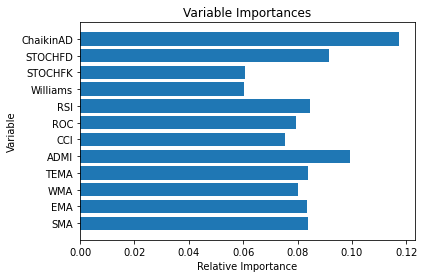

In [47]:
plt.barh(features, importances)
plt.title("Variable Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Variable")

## Back Testing